# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../../data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
import seaborn as sns

app_train['DAYS_BIRTH'] = app_train['DAYS_BIRTH'] / 365
app_train['DAYS_BIRTH'] = app_train['DAYS_BIRTH'].apply(np.floor) # 取最小整數
app_train['DAYS_BIRTH']

0         25.0
1         45.0
2         52.0
3         52.0
4         54.0
          ... 
307506    25.0
307507    56.0
307508    41.0
307509    32.0
307510    46.0
Name: DAYS_BIRTH, Length: 307511, dtype: float64

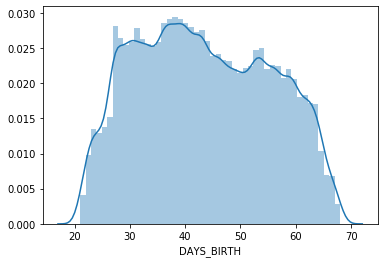

In [6]:
sns.distplot(app_train['DAYS_BIRTH'])

In [7]:
app_train['BIRTH_grp'] = pd.cut(app_train['DAYS_BIRTH'], 10)

In [11]:
app_train['BIRTH_grp'].unique().sort_values()

[(19.951, 24.9], (24.9, 29.8], (29.8, 34.7], (34.7, 39.6], (39.6, 44.5], (44.5, 49.4], (49.4, 54.3], (54.3, 59.2], (59.2, 64.1], (64.1, 69.0]]
Categories (10, interval[float64]): [(19.951, 24.9] < (24.9, 29.8] < (29.8, 34.7] < (34.7, 39.6] ... (49.4, 54.3] < (54.3, 59.2] < (59.2, 64.1] < (64.1, 69.0]]

In [21]:
app_train['BIRTH_grp'].value_counts()

(34.7, 39.6]      42860
(39.6, 44.5]      41416
(29.8, 34.7]      39439
(44.5, 49.4]      35127
(49.4, 54.3]      34942
(54.3, 59.2]      33132
(24.9, 29.8]      32850
(59.2, 64.1]      27473
(19.951, 24.9]    12150
(64.1, 69.0]       8122
Name: BIRTH_grp, dtype: int64

In [28]:
new = app_train.groupby(by = 'BIRTH_grp').mean()
new

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
BIRTH_grp,,,,,,,,,,,,,,,,,,,,,
"(19.951, 24.9]",277380.972181,0.123128,0.262551,0.318107,0.631934,0.214156,145340.566741,414932.426296,21679.902873,374895.519759,...,0.000000,0.000329,0.005267,0.008982,0.006822,0.033769,0.157703,0.270381,1.545196,0.002798
"(24.9, 29.8]",277845.648280,0.111385,0.107184,0.382253,0.602161,0.527062,164695.362592,506661.538356,25845.193117,456467.537617,...,0.000609,0.000974,0.000791,0.007458,0.007826,0.033728,0.223639,0.257918,1.793335,0.003105
"(29.8, 34.7]",277961.057075,0.102868,0.098253,0.409392,0.629986,0.815741,178150.035970,571900.079769,27403.084844,513764.647775,...,0.000735,0.000634,0.000051,0.006208,0.007782,0.034801,0.288233,0.252937,1.783060,0.004032
"(34.7, 39.6]",278129.590037,0.089314,0.095287,0.405810,0.660663,0.846547,179607.927205,627027.986969,28277.132948,564054.581484,...,0.000560,0.000537,0.000140,0.006157,0.007002,0.033874,0.279686,0.264282,1.827723,0.008003
"(39.6, 44.5]",278900.570504,0.078593,0.095350,0.392095,0.684663,0.584871,181419.624480,648807.622115,28758.506858,583003.112630,...,0.000966,0.000797,0.000072,0.006011,0.006174,0.034226,0.295253,0.260215,1.880832,0.015405
"(44.5, 49.4]",277982.210209,0.074159,0.089760,0.357560,0.749281,0.285820,179589.433318,668395.187036,28951.081367,597839.242501,...,0.000826,0.000427,0.000000,0.006910,0.006582,0.033173,0.305531,0.253692,1.880342,0.033706
"(49.4, 54.3]",278403.303503,0.066997,0.081764,0.310543,0.736964,0.108380,171301.163641,654340.954095,28188.421525,587842.602182,...,0.000601,0.000343,0.000029,0.006053,0.007271,0.037077,0.294611,0.263094,1.944532,0.123176
"(54.3, 59.2]",278550.832428,0.055294,0.078836,0.253652,0.751690,0.039961,158607.566767,639062.035540,26894.768238,575252.465169,...,0.000483,0.000302,0.000030,0.005945,0.006873,0.033196,0.271443,0.281271,2.036770,0.574128
"(59.2, 64.1]",277823.782368,0.052779,0.073782,0.197030,0.770939,0.015433,144798.646618,598835.389637,25433.941033,538573.602925,...,0.000146,0.000073,0.000000,0.006738,0.007156,0.035865,0.214187,0.283867,2.161875,0.811560


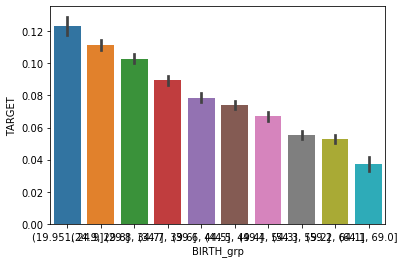

In [29]:
sns.barplot(app_train['BIRTH_grp'], app_train['TARGET'])